In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
%matplotlib inline

import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import statsmodels.api as sm
!pip install matplotlib
!pip install pythermalcomfort
!pip install scipy
!pip install seaborn
!pip install statistics

from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.metrics import r2_score, mean_squared_error

In [43]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [44]:
!pip install pandas scikit-learn

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [45]:
df = pd.read_csv("/content/df.csv")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-45-b0d87d21d2df>:1: DtypeWarning: Columns (5,35,36) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/content/df.csv")


In [46]:
from sklearn.preprocessing import StandardScaler

df_test=df[['region','season','building_type','age','gender','ta','tr','rh','vel','met','clo','thermal_sensation','pmv']]
df_test = df_test.dropna()

# Sélectionnez les variables à inclure dans la PCA
variables = df_test[['pmv', 'thermal_sensation']]

# Standardisez les variables
scaler = StandardScaler()
scaled_variables = scaler.fit_transform(variables)

# Appliquez la PCA avec le nombre de composantes principales souhaité (ici, 1)
pca = PCA(n_components=1)
new_variable = pca.fit_transform(scaled_variables)

# Ajoutez la nouvelle variable au DataFrame
df_test['combined_pca_variable'] = new_variable

# Normaliser la variable combined_pca_variable de -3 à 3
min_value = -3
max_value = 3

# Appliquer la normalisation Min-Max
df_test['combined_pca_variable'] = (df_test['combined_pca_variable'] - df_test['combined_pca_variable'].min()) / (df_test['combined_pca_variable'].max() - df_test['combined_pca_variable'].min()) * (max_value - min_value) + min_value

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [47]:
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from joblib import dump
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


# Sélectionner les colonnes pour l'entraînement et la prédiction
selected_cols = ['region', 'season', 'building_type', 'age', 'gender', 'ta', 'tr', 'rh', 'vel', 'met', 'clo', 'combined_pca_variable']

# Séparer les données en fonction des attributs et de la cible
df_selected = df_test[selected_cols]

# Diviser les données en ensemble d'entraînement et ensemble de test (80% entraînement, 20% test)
X_train, X_test, y_train, y_test = train_test_split(df_selected.drop('combined_pca_variable', axis=1), df_selected['combined_pca_variable'], test_size=0.2, random_state=42)

categorical_cols = ['region', 'season', 'building_type', 'gender']

# Créer un préprocesseur pour les données catégorielles et numériques
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), X_train.select_dtypes(include=['int64', 'float64']).columns),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ])

# Créer le pipeline complet avec le préprocesseur et la régression linéaire
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('model',XGBRegressor(objective='reg:squarederror'))  # Utiliser LinearRegression pour la régression linéaire
])

# Entraîner le modèle sur l'ensemble d'entraînement
pipeline.fit(X_train, y_train)

# Faire des prédictions sur l'ensemble de test
y_pred = pipeline.predict(X_test)

# Calculer l'erreur MSE
mse = mean_squared_error(y_test,y_pred )
print(f'Mean Squared Error (MSE): {mse}')
r2=r2_score(y_test, y_pred)
print(f'R² score : {r2}')


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Mean Squared Error (MSE): 0.25979067518610255
R² score : 0.6772735173790305


In [48]:
# Fonction pour prédire thermal sensation
def predict_thermal_sensation(region, season, building_type, age, gender, ta, tr, rh, vel, met, clo):
    # Créer un DataFrame avec les valeurs d'attributs
    input_data = pd.DataFrame({
        'region': [region],
        'season': [season],
        'building_type': [building_type],
        'age': [age],
        'gender': [gender],
        'ta': [ta],
        'tr': [tr],
        'rh': [rh],
        'vel': [vel],
        'met': [met],
        'clo': [clo]
    })

    # Utiliser le modèle pour prédire thermal sensation
    predicted_thermal_sensation = pipeline.predict(input_data)

    return predicted_thermal_sensation[0]



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# **Interface utilisateur**

In [49]:
import pandas as pd
import ipywidgets as widgets
from IPython.display import display

# Fonction pour prédire thermal sensation
def predict_thermal_sensation(region, season, building_type, age, gender, ta, tr, rh, vel, met, clo):
    # Créer un DataFrame avec les valeurs d'attributs
    input_data = pd.DataFrame({
        'region': [region],
        'season': [season],
        'building_type': [building_type],
        'age': [age],
        'gender': [gender],
        'ta': [ta],
        'tr': [tr],
        'rh': [rh],
        'vel': [vel],
        'met': [met],
        'clo': [clo]
    })

    # Utiliser le modèle pour prédire thermal sensation
    predicted_thermal_sensation = pipeline.predict(input_data)
    return predicted_thermal_sensation[0]

# Dictionnaires pour MET et CLO
met_activities = {
    'Basketball': 6.3, 'Calisthenics': 3.5, 'Cooking': 1.8, 'Dancing': 3.4,
    'Driving a car': 1.5, 'Driving, heavy vehicle': 3.2, 'Filing, seated': 1.2,
    'Filing, standing': 1.4, 'Flying aircraft, combat': 2.4, 'Flying aircraft, routine': 1.2,
    'Handling 100lb (45 kg) bags': 4.0, 'Heavy machine work': 4.0, 'House cleaning': 2.7,
    'Lifting/packing': 2.1, 'Light machine work': 2.2, 'Pick and shovel work': 4.4,
    'Reading, seated': 1.0, 'Reclining': 0.8, 'Seated, heavy limb movement': 2.2,
    'Seated, quiet': 1.0, 'Sleeping': 0.7, 'Standing, relaxed': 1.2, 'Table sawing': 1.8,
    'Tennis': 3.8, 'Typing': 1.1, 'Walking 2mph (3.2kmh)': 2.0, 'Walking 3mph (4.8kmh)': 2.6,
    'Walking 4mph (6.4kmh)': 3.8, 'Walking about': 1.7, 'Wrestling': 7.8, 'Writing': 1.0
}

clo_options = {
    'Jacket, Trousers, long-sleeve shirt': 0.96,
    'Knee-length skirt, long-sleeve shirt, full slip': 0.67,
    'Knee-length skirt, short-sleeve shirt, sandals, underwear': 0.54,
    'Sweat pants, long-sleeve sweatshirt': 0.74,
    'Trousers, long-sleeve shirt': 0.61,
    'Trousers, short-sleeve shirt, socks, shoes, underwear': 0.57,
    'Typical summer indoor clothing': 0.5,
    'Typical winter indoor clothing': 1.0,
    'Walking shorts, short-sleeve shirt': 0.36
}

# Widgets pour les entrées utilisateur
region_widget = widgets.Dropdown(options=['oceania', 'americas', 'europe', 'asia', 'africa'], description='Region:')
season_widget = widgets.Dropdown(options=['winter', 'spring', 'summer', 'autumn'], description='Season:')
building_type_widget = widgets.Dropdown(options=['classroom', 'multifamily housing', 'office', 'senior center', 'others'], description='Building Type:')
age_widget = widgets.IntSlider(min=6, max=95, value=25, description='Age:')
gender_widget = widgets.Dropdown(options=['male', 'female'], description='Gender:')
ta_widget = widgets.FloatSlider(min=10.1, max=39.8, value=20, description='Ta:')
tr_widget = widgets.FloatSlider(min=1.17, max=49.53, value=20, description='Tr:')
rh_widget = widgets.FloatSlider(min=2, max=100, value=50, description='RH:')
vel_widget = widgets.FloatSlider(min=0, max=3.97, value=0.1, description='Vel:')
met_activity_widget = widgets.Dropdown(options=list(met_activities.keys()), description='MET Activity:')
clo_widget = widgets.Dropdown(options=list(clo_options.keys()), description='Clothing:')

# Bouton de prédiction
predict_button = widgets.Button(description="Predict Thermal Sensation")

# Fonction appelée lorsque le bouton est cliqué
def on_predict_button_clicked(b):
    region = region_widget.value
    season = season_widget.value
    building_type = building_type_widget.value
    age = age_widget.value
    gender = gender_widget.value
    ta = ta_widget.value
    tr = tr_widget.value
    rh = rh_widget.value
    vel = vel_widget.value
    met = met_activities[met_activity_widget.value]
    clo = clo_options[clo_widget.value]

    # Appel de la fonction de prédiction
    prediction = predict_thermal_sensation(region, season, building_type, age, gender, ta, tr, rh, vel, met, clo)

    # Afficher le résultat
    print(f"Predicted Thermal Sensation: {prediction}")

predict_button.on_click(on_predict_button_clicked)

# Affichage des widgets
display(region_widget, season_widget, building_type_widget, age_widget, gender_widget, ta_widget, tr_widget, rh_widget, vel_widget, met_activity_widget, clo_widget, predict_button)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Dropdown(description='Region:', options=('oceania', 'americas', 'europe', 'asia', 'africa'), value='oceania')

Dropdown(description='Season:', options=('winter', 'spring', 'summer', 'autumn'), value='winter')

Dropdown(description='Building Type:', options=('classroom', 'multifamily housing', 'office', 'senior center',…

IntSlider(value=25, description='Age:', max=95, min=6)

Dropdown(description='Gender:', options=('male', 'female'), value='male')

FloatSlider(value=20.0, description='Ta:', max=39.8, min=10.1)

FloatSlider(value=20.0, description='Tr:', max=49.53, min=1.17)

FloatSlider(value=50.0, description='RH:', min=2.0)

FloatSlider(value=0.1, description='Vel:', max=3.97)

Dropdown(description='MET Activity:', options=('Basketball', 'Calisthenics', 'Cooking', 'Dancing', 'Driving a …

Dropdown(description='Clothing:', options=('Jacket, Trousers, long-sleeve shirt', 'Knee-length skirt, long-sle…

Button(description='Predict Thermal Sensation', style=ButtonStyle())

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Dropdown(description='Region:', options=('oceania', 'americas', 'europe', 'asia', 'africa'), value='oceania')

Dropdown(description='Season:', options=('winter', 'spring', 'summer', 'autumn'), value='winter')

Dropdown(description='Building Type:', options=('classroom', 'multifamily housing', 'office', 'senior center',…

IntSlider(value=25, description='Age:', max=95, min=6)

Dropdown(description='Gender:', options=('male', 'female'), value='male')

FloatSlider(value=20.0, description='Ta:', max=39.8, min=10.1)

FloatSlider(value=20.0, description='Tr:', max=49.53, min=1.17)

FloatSlider(value=50.0, description='RH:', min=2.0)

FloatSlider(value=0.1, description='Vel:', max=3.97)

Dropdown(description='MET Activity:', options=('Basketball', 'Calisthenics', 'Cooking', 'Dancing', 'Driving a …

Dropdown(description='Clothing:', options=('Jacket, Trousers, long-sleeve shirt', 'Knee-length skirt, long-sle…

Button(description='Predict Thermal Sensation', style=ButtonStyle())

Output()

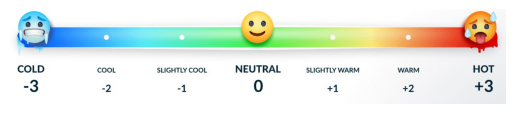

Predicted Thermal Sensation: -1.5826945304870605
Predicted Thermal Sensation: -0.9009966850280762
Predicted Thermal Sensation: -0.9009966850280762


In [53]:
from pythermalcomfort.models import pmv
from pythermalcomfort.utilities import v_relative

def on_predict_button_clicked(b):
    with output_box:
        output_box.clear_output()
        region = region_widget.value
        season = season_widget.value
        building_type = building_type_widget.value
        age = age_widget.value
        gender = gender_widget.value
        ta = ta_widget.value  # Temperature de l'air (tdb)
        tr = tr_widget.value
        rh = rh_widget.value
        vel = vel_widget.value
        met = met_activities[met_activity_widget.value]
        clo = clo_options[clo_widget.value]


        prediction = predict_thermal_sensation(region, season, building_type, age, gender, ta, tr, rh, vel, met, clo)


        #print(f"Thermal Sensation: {prediction}")

predict_button.on_click(on_predict_button_clicked)
output_box = widgets.Output()
display(region_widget, season_widget, building_type_widget, age_widget, gender_widget, ta_widget, tr_widget, rh_widget, vel_widget, met_activity_widget, clo_widget, predict_button, output_box)

img = mpimg.imread("/content/PMV valeurs.jpg")
plt.imshow(img)
plt.axis('off')
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


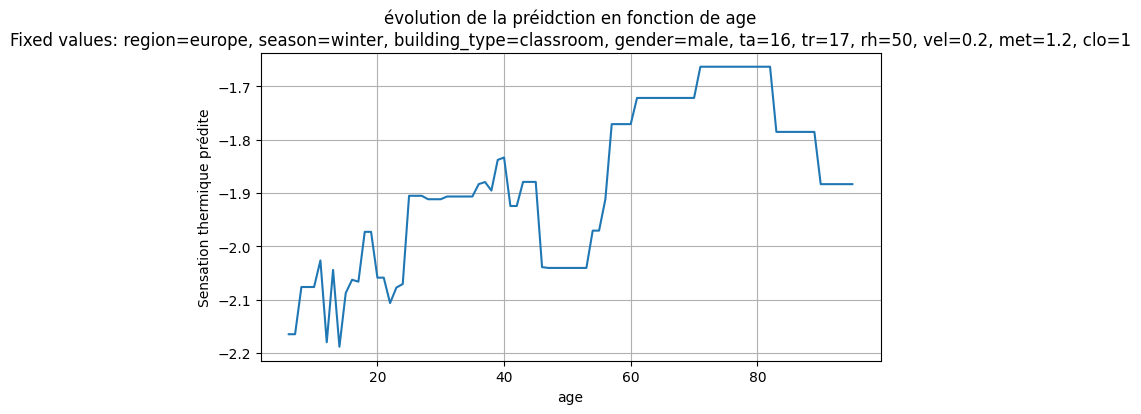

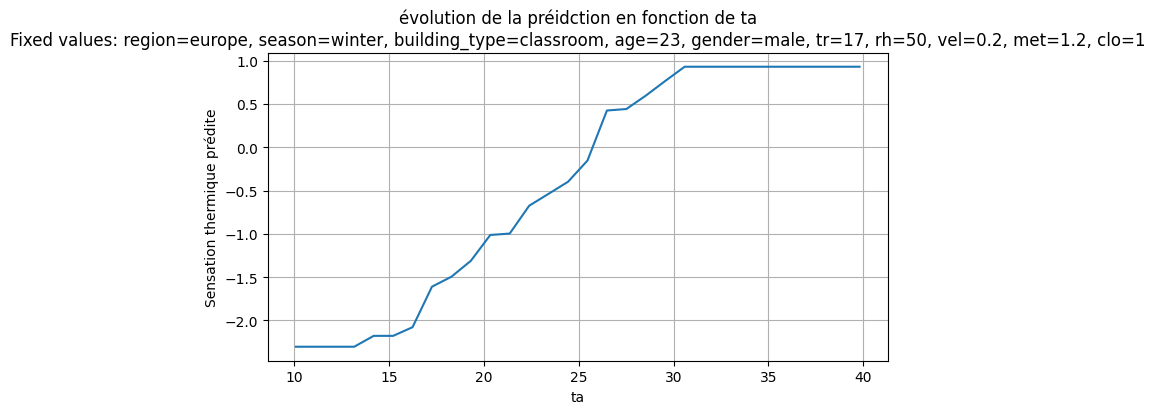

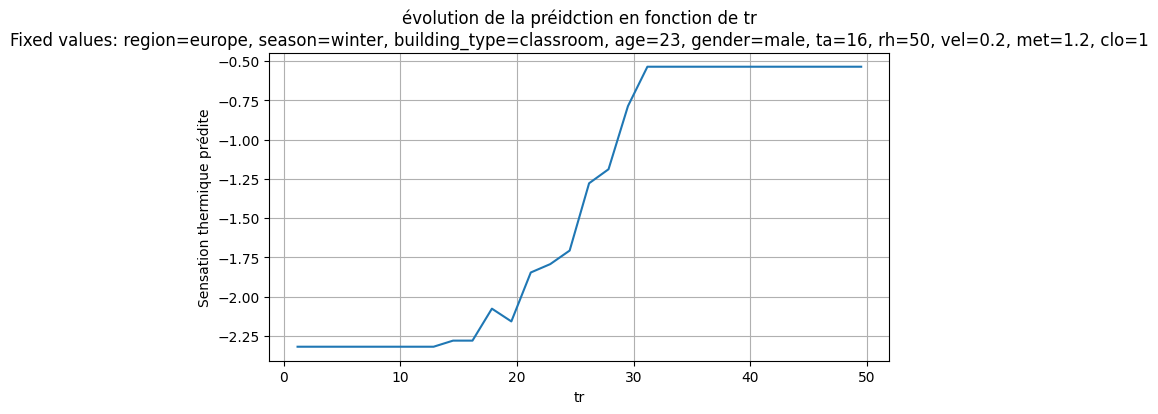

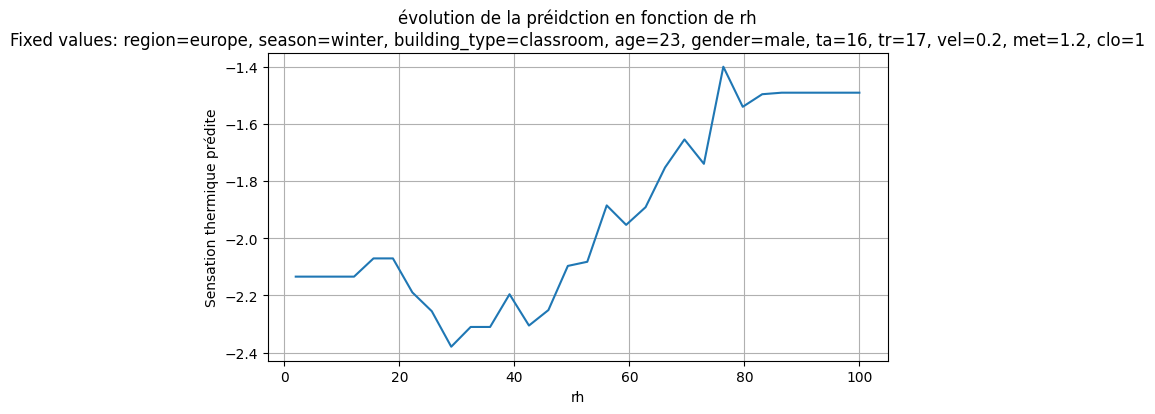

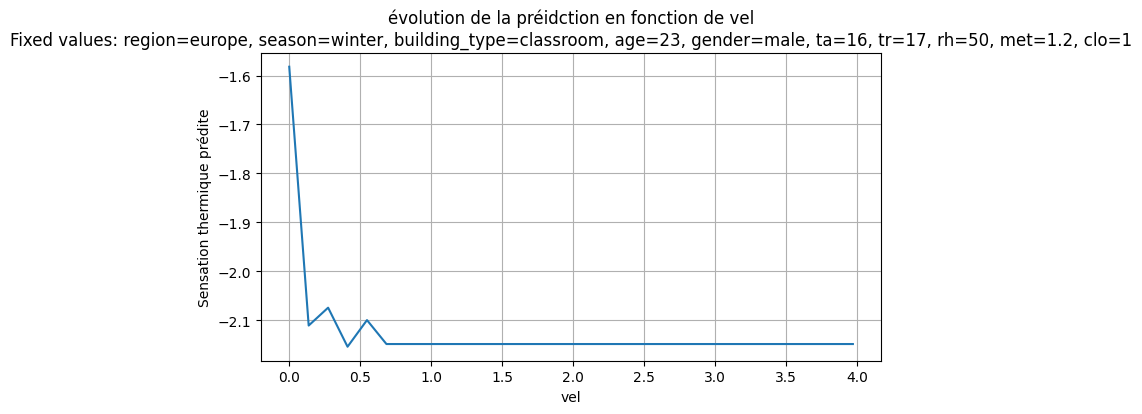

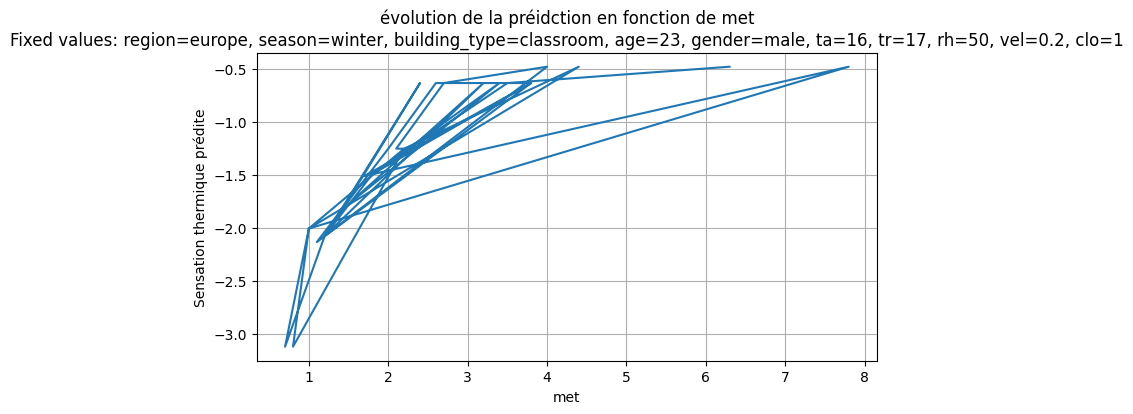

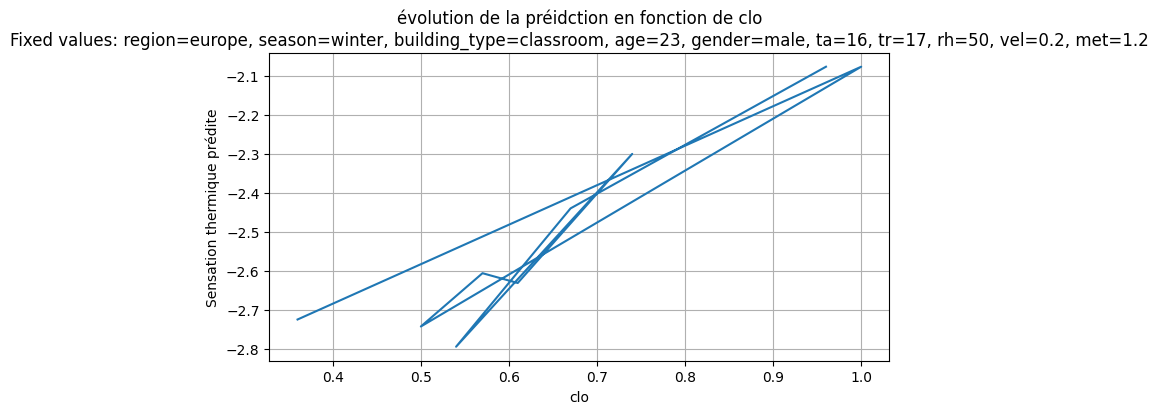

In [51]:
import numpy as np
import matplotlib.pyplot as plt


age_range = np.arange(6, 96)  # Plage d'âge
ta_range = np.linspace(10.1, 39.8, 30)  # Température de l'air
tr_range = np.linspace(1.173, 49.528, 30)  # Température radiante
rh_range = np.linspace(2, 100, 30)  # Humidité relative
vel_range = np.linspace(0, 3.97, 30)  # Vitesse de l'air
met_activities = {
    'Basketball': 6.3, 'Calisthenics': 3.5, 'Cooking': 1.8, 'Dancing': 3.4,
    'Driving a car': 1.5, 'Driving, heavy vehicle': 3.2, 'Filing, seated': 1.2,
    'Filing, standing': 1.4, 'Flying aircraft, combat': 2.4, 'Flying aircraft, routine': 1.2,
    'Handling 100lb (45 kg) bags': 4.0, 'Heavy machine work': 4.0, 'House cleaning': 2.7,
    'Lifting/packing': 2.1, 'Light machine work': 2.2, 'Pick and shovel work': 4.4,
    'Reading, seated': 1.0, 'Reclining': 0.8, 'Seated, heavy limb movement': 2.2,
    'Seated, quiet': 1.0, 'Sleeping': 0.7, 'Standing, relaxed': 1.2, 'Table sawing': 1.8,
    'Tennis': 3.8, 'Typing': 1.1, 'Walking 2mph (3.2kmh)': 2.0, 'Walking 3mph (4.8kmh)': 2.6,
    'Walking 4mph (6.4kmh)': 3.8, 'Walking about': 1.7, 'Wrestling': 7.8, 'Writing': 1.0
}

clo_options = {
    'Jacket, Trousers, long-sleeve shirt': 0.96,
    'Knee-length skirt, long-sleeve shirt, full slip': 0.67,
    'Knee-length skirt, short-sleeve shirt, sandals, underwear': 0.54,
    'Sweat pants, long-sleeve sweatshirt': 0.74,
    'Trousers, long-sleeve shirt': 0.61,
    'Trousers, short-sleeve shirt, socks, shoes, underwear': 0.57,
    'Typical summer indoor clothing': 0.5,
    'Typical winter indoor clothing': 1.0,    'Walking shorts, short-sleeve shirt': 0.36
}


met_values = list(met_activities.values())
clo_values = list(clo_options.values())


def generate_predictions(var_name, var_range, fixed_values):
    predictions = []
    for value in var_range:
        inputs = fixed_values.copy()
        inputs[var_name] = value
        prediction = predict_thermal_sensation(**inputs)
        predictions.append(prediction)
    return predictions

def plot_sensitivity_analysis(var_name, var_range, predictions, fixed_values):
    plt.figure(figsize=(8, 4))
    plt.plot(var_range, predictions, label=var_name)
    plt.xlabel(var_name)
    plt.ylabel('Sensation thermique prédite')


    fixed_values_str = ", ".join([f"{k}={v}" for k, v in fixed_values.items() if k != var_name])
    plt.title(f'évolution de la préidction en fonction de {var_name}\nFixed values: {fixed_values_str}')
    plt.grid(True)
    plt.show()

fixed_values = {
    'region': 'europe', 'season': 'winter', 'building_type': 'classroom',
    'age': 23, 'gender': 'male', 'ta': 16, 'tr': 17, 'rh': 50,
    'vel': 0.2, 'met': 1.2, 'clo': 1
}


for var_name, var_range in [('age', age_range), ('ta', ta_range), ('tr', tr_range),
                            ('rh', rh_range), ('vel', vel_range)]:
    predictions = generate_predictions(var_name, var_range, fixed_values)
    plot_sensitivity_analysis(var_name, var_range, predictions, fixed_values)


for var_name, var_values in [('met', met_values), ('clo', clo_values)]:
    predictions = generate_predictions(var_name, var_values, fixed_values)
    plot_sensitivity_analysis(var_name, var_values, predictions, fixed_values)
